In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [ ]:
from keras.optimizers import RMSprop

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (40, 40, 3)))
model.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
#model.add(Dropout(.01))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (40, 40, 3)))
model.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
#model.add(Dropout(.01))

model.add(Conv2D(filters = 96, kernel_size = (3, 3), padding = 'Same', activation = 'relu', input_shape = (40, 40, 3)))
model.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))


model.add(Flatten())


model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.01))

model.add(Dense(units = 50, activation = 'softmax'))

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 96)         0

In [ ]:
my_model=model

In [ ]:
import pandas as pd
from io import StringIO

In [ ]:
summary_str = StringIO()
my_model.summary(print_fn=lambda x: summary_str.write(x + '\n'))

# Create a Pandas DataFrame from the captured summary string
summary_df = pd.read_csv(StringIO(summary_str.getvalue()), sep='\t')

# Save the DataFrame to an Excel file
summary_df.to_excel('model_summary.xlsx', index=False)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Data Set/Dataset/Train', target_size = (40, 40),
                                                 batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/Data Set/Dataset/Test', target_size = (40, 40),
                                                 batch_size = 32, class_mode = 'categorical')

Found 12029 images belonging to 50 classes.
Found 3093 images belonging to 50 classes.


In [ ]:
import keras

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/Data Set/Dataset/best_model_17_8_23.h5')

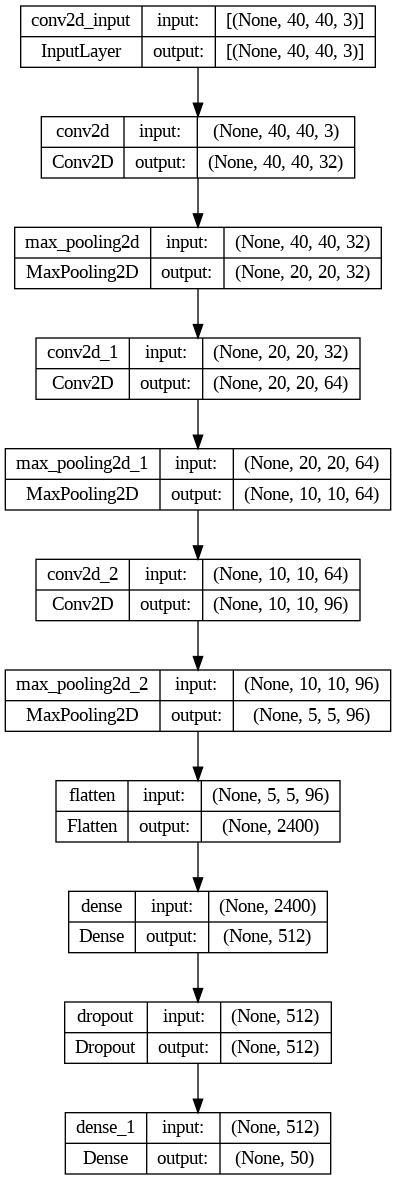

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 8.3 MB/s eta 0:00:00


In [ ]:
import visualkeras

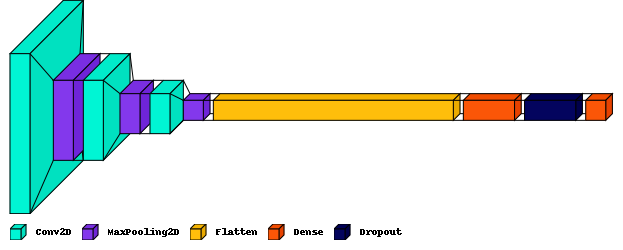

In [ ]:
from tensorflow.keras import layers
from collections import defaultdict

color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True,color_map=color_map)

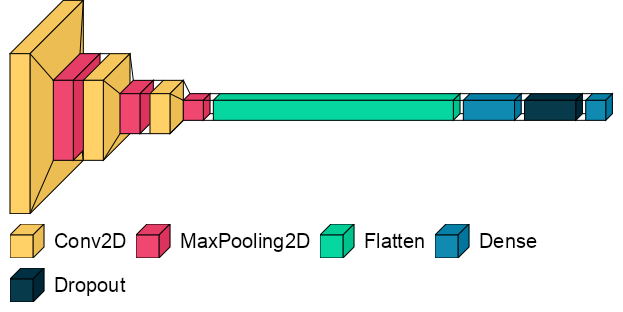

In [ ]:
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 20)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

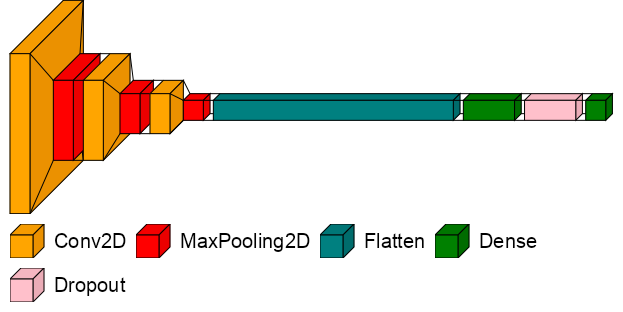

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict
import visualkeras

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

# Specify the font family and size
font_family = "arial.ttf"  # Replace with your desired font file
font_size =20  # Adjust as per your preference

# Create the ImageFont object with the specified font family and size
font = ImageFont.truetype(font_family, font_size)

visualkeras.layered_view(model, legend=True, color_map=color_map, font=font)



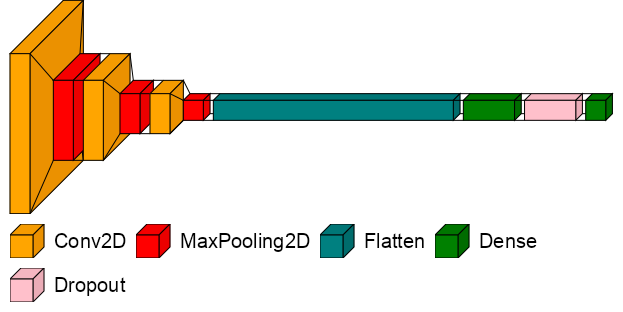

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict
import visualkeras

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

# Specify the font family and size
font_family = "arial.ttf"  # Replace with your desired font file
font_size =20  # Adjust as per your preference

# Create the ImageFont object with the specified font family and size
font = ImageFont.truetype(font_family, font_size)

visualkeras.layered_view(model, legend=True, color_map=color_map, font=font)



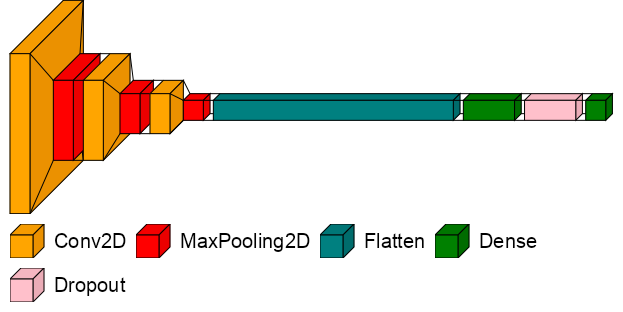

In [ ]:

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from collections import defaultdict
import visualkeras
from PIL import ImageFont

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dropout]['fill'] = 'pink'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

font_family = "arial.ttf"  # Replace with your desired font file
font_size = 20  # Adjust as per your preference

font = ImageFont.truetype(font_family, font_size)

visualkeras.layered_view(model, legend=True, color_map=color_map, font=font)
#visualkeras.utils.save('model.png', "model.png")  # Save the model visualization as an image
